# Eddy Current Brake Design Project

   The main goal of the project is to design an eddy current brake which will be used as a mechanical damper. For this purpose, the project contains two main parts. In the first part of the project, some technical details such as electro magnetic consept and mathematical calculations will be discussed. Then, in the second part, by using the information from the first part, geometrical structure will be designed and the proof of concept will be done by using a FEA software. as FEA software, for simulations COMSOL Multiphysics will be used.
   


## How does the eddy current brake work?

Before starting the finite elemet design and analysis, it is significant to clearly understand its working princple and its relation with electromagnetic rules and equations.

Eddy current brake in its simplest form consists of a disc of conductive material and a permanent magnet. It is also known as magnetic brake. The magnet generates a constant magnetic field on a specific area of the disc of conductive material. The position of that area does not change during the rotation of the disc. However, because of the motion, while one side of the area magnetic field decreases, on the other side of the area magnetic field increases. On these parts of the area, we can say that we have non-constant magnetic fields which will create another opposite directional magnetic fields that should compansate the change of the magnetic field for each side of the area. Then, these magnetic fields induce clockwise and counter-clockwise rotating currents which is called **eddy current**. Finally, the Lorentz forces from the currents slow the disc.

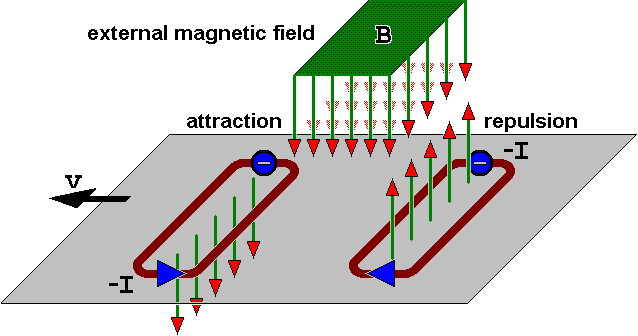

In [3]:
from IPython.display import Image
Image(filename='Images/eddy.png')

$$\int x^2 x\,  dx = \frac{x^3}3 +C$$